In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load data using Pandas

In [ ]:
sales = pd.read_csv("home_data.csv")
sales = sales.sample(frac=0.01, random_state=0) 
sales.head()

Number of points: 216


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17384,1453602313,20141029T000000,297000,2,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
722,2225059214,20140808T000000,1578000,4,3.25,4670,51836,2.0,0,0,...,12,4670,0,1988,0,98005,47.6350,-122.164,4230,41075
2680,2768000270,20140625T000000,562100,2,0.75,1440,3700,1.0,0,0,...,7,1200,240,1914,0,98107,47.6707,-122.364,1440,4300
18754,6819100040,20140624T000000,631500,2,1.00,1130,2640,1.0,0,0,...,8,1130,0,1927,0,98109,47.6438,-122.357,1680,3200
14554,4027700666,20150426T000000,780000,4,2.50,3180,9603,2.0,0,2,...,9,3180,0,2002,0,98155,47.7717,-122.277,2440,15261


In [ ]:
from math import sqrt

# All of the features of interest
features = [
    'bedrooms', 
    'bathrooms',
    'sqft_living', 
    'sqft_lot', 
    'floors', 
    'waterfront', 
    'view', 
    'condition', 
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built', 
    'yr_renovated'
]

# Compute the square and sqrt of each feature
all_features = []
for feat in features:
    square_feat = feat + '_square'
    sqrt_feat = feat + '_sqrt'
    
    sales[square_feat] = sales[feat] ** 2
    sales[sqrt_feat] = sales[feat].apply(sqrt)
    
    all_features.extend([feat, square_feat, sqrt_feat])
    
print(sales.head())

X = sales[all_features]
y = sales['price']

               id             date    price  bedrooms  bathrooms  sqft_living  \
17384  1453602313  20141029T000000   297000         2       1.50         1430   
722    2225059214  20140808T000000  1578000         4       3.25         4670   
2680   2768000270  20140625T000000   562100         2       0.75         1440   
18754  6819100040  20140624T000000   631500         2       1.00         1130   
14554  4027700666  20150426T000000   780000         4       2.50         3180   

       sqft_lot  floors  waterfront  view  ...  grade_square  grade_sqrt  \
17384      1650     3.0           0     0  ...            49    2.645751   
722       51836     2.0           0     0  ...           144    3.464102   
2680       3700     1.0           0     0  ...            49    2.645751   
18754      2640     1.0           0     0  ...            64    2.828427   
14554      9603     2.0           0     2  ...            81    3.000000   

       sqft_above_square  sqft_above_sqrt  sqft_basement

# Split training, validation, testing data.
70% training, 10% validaiton, 20% testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train_and_validation, X_test, y_train_and_validation, y_test  =  train_test_split(X, y, random_state = 6, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_validation, y_train_and_validation, random_state = 6, test_size = 0.125)
print(X_train.shape, X_val.shape, X_test.shape)

(150, 39) (22, 39) (44, 39)


# Standardize data for Lasoo & Ridge

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
y_train = y_train - np.mean(y_train)

X_test = scaler.transform(X_test)
y_test = y_test - np.mean(y_train)

X_val = scaler.transform(X_val)
y_val = y_val - np.mean(y_train)

# 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
linreg.fit(X_train, y_train)
train_pred = linreg.predict(X_train)
test_pred = linreg.predict(X_test)
train_rmse = mean_squared_error(y_train, train_pred, squared = False)
test_rmse = mean_squared_error(y_test, test_pred, squared = False)
print('Train', train_rmse)
print('Test', test_rmse)

Train 142457.3154234857
Test 675086.242548365
(1894086.5763674816, 'bedrooms')
(-746759.7299082308, 'bedrooms_square')
(-1198012.111738742, 'bedrooms_sqrt')
(-1617526.539555181, 'bathrooms')
(764857.6728405949, 'bathrooms_square')
(969565.6521354774, 'bathrooms_sqrt')
(979868.2933625596, 'sqft_living')
(-579540.0225597759, 'sqft_living_square')
(-941586.0021521985, 'sqft_living_sqrt')
(278470.19944551104, 'sqft_lot')
(-103922.78095722805, 'sqft_lot_square')
(-173278.257107394, 'sqft_lot_sqrt')
(25579.278123902543, 'floors')
(64576.72518035928, 'floors_square')
(-130359.30139444595, 'floors_sqrt')
(44515.012195357085, 'waterfront')
(44515.02848184643, 'waterfront_square')
(44515.02877533743, 'waterfront_sqrt')
(-520068.6097835349, 'view')
(238192.56342691297, 'view_square')
(293040.79825962934, 'view_sqrt')
(11076.309026256977, 'condition')
(-15052.107393390146, 'condition_square')
(23447.096484998125, 'condition_sqrt')
(-6386845.485037076, 'grade')
(2218110.936366662, 'grade_square')
(

# 2. Ridge Regression
test alphas: (np.logspace(-5, 5, 11))

In [ ]:
print(np.logspace(-5, 5, 11))

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05]


In [ ]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

l2_penalties = np.logspace(-5, 5, 11)#make the list of lambda values
ridge_data = []

for l2_penalty in l2_penalties:
    print(l2_penalty)
    model = Ridge(alpha = l2_penalty, random_state = 0) 
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    train_rmse =  mean_squared_error(y_train, train_pred, squared = False)
    validation_rmse = mean_squared_error(y_val, val_pred, squared = False)
    
    ridge_data.append({
        'l2_penalty': l2_penalty,
        'model': model,
        'train_rmse': train_rmse,
        'validation_rmse': validation_rmse})
    
ridge_data = pd.DataFrame(ridge_data) #put ridge_data to pds dataframe for later use
print(ridge_data)

1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
      l2_penalty                                  model     train_rmse  \
0        0.00001     Ridge(alpha=1e-05, random_state=0)  146188.566942   
1        0.00010    Ridge(alpha=0.0001, random_state=0)  146210.884175   
2        0.00100     Ridge(alpha=0.001, random_state=0)  146610.292053   
3        0.01000      Ridge(alpha=0.01, random_state=0)  147967.692703   
4        0.10000       Ridge(alpha=0.1, random_state=0)  151619.819399   
5        1.00000                  Ridge(random_state=0)  154932.690092   
6       10.00000      Ridge(alpha=10.0, random_state=0)  161876.430362   
7      100.00000     Ridge(alpha=100.0, random_state=0)  181371.431142   
8     1000.00000    Ridge(alpha=1000.0, random_state=0)  244296.061524   
9    10000.00000   Ridge(alpha=10000.0, random_state=0)  328840.881425   
10  100000.00000  Ridge(alpha=100000.0, random_state=0)  353757.594802   

    validation_rmse  
0     643241.226105  


### Investigating Ridge Regression Results


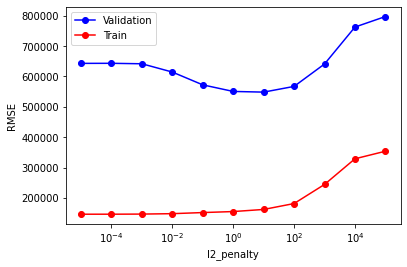

In [ ]:
# Plot the validation RMSE as a blue line with dots
plt.plot(ridge_data['l2_penalty'], ridge_data['validation_rmse'], 
         'b-o', label='Validation')
# Plot the train RMSE as a red line dots
plt.plot(ridge_data['l2_penalty'], ridge_data['train_rmse'], 
         'r-o', label='Train')

# Make the x-axis log scale for readability
plt.xscale('log')

# Label the axes and make a legend
plt.xlabel('l2_penalty')
plt.ylabel('RMSE')
plt.legend()

### Define function that will be used to inspect the model parameters.

In [ ]:
def print_coefficients(model, features):
    """
    This function takes in a model column and a features column. 
    And prints the coefficient along with its feature name.
    """
    feats = list(zip(model.coef_, features))
    print(*feats, sep = "\n")

### Best Ridge Model
the model with minimun RMSE on validation sets


In [ ]:
#Print information about best L2 model
best_ridge = ridge_data.loc[ridge_data['validation_rmse'].idxmin()] 
test_pred = best_ridge["model"].predict(X_test)
test_rmse = mean_squared_error(y_test, test_pred, squared = False)
print('Best L2 Penalty', best_ridge['l2_penalty'])
print('TEST RMSE', test_rmse)
print_coefficients(best_ridge['model'], all_features) 

Best L2 Penalty 10.0
TEST RMSE 626479.1919393151
(-12814.960695689799, 'bedrooms')
(-5578.585627553891, 'bedrooms_square')
(-19987.878641088657, 'bedrooms_sqrt')
(-261.23310460046054, 'bathrooms')
(139717.2093055051, 'bathrooms_square')
(-50659.47327155907, 'bathrooms_sqrt')
(23125.504167268646, 'sqft_living')
(19304.655191207854, 'sqft_living_square')
(14413.319225996473, 'sqft_living_sqrt')
(18909.076417532742, 'sqft_lot')
(21375.201111502724, 'sqft_lot_square')
(-25079.695226768985, 'sqft_lot_sqrt')
(-15962.664049881223, 'floors')
(13961.951626360782, 'floors_square')
(-27220.38377204604, 'floors_sqrt')
(43800.147497760285, 'waterfront')
(43800.14749776011, 'waterfront_square')
(43800.1474977602, 'waterfront_sqrt')
(-7513.023932352438, 'view')
(11529.923304894006, 'view_square')
(-12278.672850845967, 'view_sqrt')
(4224.607744785635, 'condition')
(4624.595688989793, 'condition_square')
(4026.4554446251373, 'condition_sqrt')
(44871.776708574565, 'grade')
(73624.90237512349, 'grade_squ

# Lasso Regression
alpha : np.logspace(1, 7, num=7)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

l1_penalties = np.logspace(1, 7, num=7)
lasso_data = []

for l1_penalty in l1_penalties:
    print(l1_penalty)
    model_lasso = Lasso(alpha = l1_penalty, random_state = 0)
    model_lasso.fit(X_train, y_train)
    train_pred = model_lasso.predict(X_train)
    val_pred = model_lasso.predict(X_val)
    train_rmse =  mean_squared_error(y_train, train_pred, squared = False)
    validation_rmse = mean_squared_error(y_val, val_pred, squared = False)

    lasso_data.append({
        'l1_penalty': l1_penalty,
        'model': model_lasso,
        'train_rmse': train_rmse,
        'validation_rmse': validation_rmse})
    
lasso_data = pd.DataFrame(lasso_data)
print(lasso_data)

10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
   l1_penalty                                    model     train_rmse  \
0        10.0        Lasso(alpha=10.0, random_state=0)  151336.667973   
1       100.0       Lasso(alpha=100.0, random_state=0)  152164.419039   
2      1000.0      Lasso(alpha=1000.0, random_state=0)  156360.395434   
3     10000.0     Lasso(alpha=10000.0, random_state=0)  169912.542560   
4    100000.0    Lasso(alpha=100000.0, random_state=0)  239553.336550   
5   1000000.0   Lasso(alpha=1000000.0, random_state=0)  357105.698956   
6  10000000.0  Lasso(alpha=10000000.0, random_state=0)  357105.698956   

   validation_rmse  
0    574102.178744  
1    561653.281862  
2    536906.548347  
3    555771.690167  
4    643989.904483  
5    802207.512615  
6    802207.512615  


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.653e+12, tolerance: 1.913e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.000e+12, tolerance: 1.913e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.343e+09, tolerance: 1.913e+09

### Investigating Lasso

how the L1 penalty affects the performance.

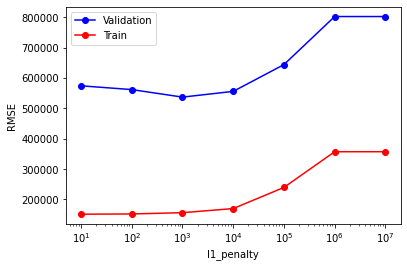

In [ ]:
# Plot the validation RMSE as a blue line with dots

plt.plot(lasso_data['l1_penalty'], lasso_data['validation_rmse'],
         'b-o', label='Validation')

# Plot the train RMSE as a red line dots
plt.plot(lasso_data['l1_penalty'], lasso_data['train_rmse'],
         'r-o', label='Train')

# Make the x-axis log scale for readability
plt.xscale('log')

# Label the axes and make a legend
plt.xlabel('l1_penalty')
plt.ylabel('RMSE')
plt.legend()

### Best Lasso Model
the model with minimun RMSE on validation sets

In [ ]:
best_lasso = lasso_data.loc[lasso_data['validation_rmse'].idxmin()]
test_pred_lasso = best_lasso['model'].predict(X_test)
test_rmse = mean_squared_error(y_test, test_pred_lasso, squared = False)
print('Best L1 Penalty', best_lasso['l1_penalty'])
print('TEST RMSE', test_rmse)
print_coefficients(best_lasso['model'], all_features)


Best L1 Penalty 1000.0
TEST RMSE 632259.577639702
(-0.0, 'bedrooms')
(-26062.072706583123, 'bedrooms_square')
(-13168.48073855585, 'bedrooms_sqrt')
(-26032.24899731306, 'bathrooms')
(234001.09464515498, 'bathrooms_square')
(-128285.03553762606, 'bathrooms_sqrt')
(0.0, 'sqft_living')
(-0.0, 'sqft_living_square')
(99795.65838300061, 'sqft_living_sqrt')
(71087.39322963884, 'sqft_lot')
(0.0, 'sqft_lot_square')
(-59249.925115629594, 'sqft_lot_sqrt')
(-0.0, 'floors')
(19590.52966922941, 'floors_square')
(-49684.08521691517, 'floors_sqrt')
(135069.2054741631, 'waterfront')
(0.0, 'waterfront_square')
(0.0, 'waterfront_sqrt')
(-0.0, 'view')
(474.070469125082, 'view_square')
(-9085.05047578395, 'view_sqrt')
(11852.073361063814, 'condition')
(0.0, 'condition_square')
(5550.624625552447, 'condition_sqrt')
(0.0, 'grade')
(147571.67381741997, 'grade_square')
(0.0, 'grade_sqrt')
(0.0, 'sqft_above')
(32841.90056200978, 'sqft_above_square')
(0.0, 'sqft_above_sqrt')
(0.0, 'sqft_basement')
(-47520.696968